In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as scs
%matplotlib inline

In [2]:
data = pd.read_csv("./data/RData3.csv", 
                   dtype={'y': int, 'x': float, 'f': 'category'})

In [3]:
data

,y,x,f
0,6,8.31,C
1,6,9.44,C
2,6,9.50,C
3,12,9.07,C
4,10,10.16,C
5,4,8.32,C
6,9,10.61,C
7,9,10.06,C
8,9,9.93,C
9,11,10.43,C


In [4]:
data.shape

(100, 3)

In [5]:
data.x

0      8.31
1      9.44
2      9.50
3      9.07
4     10.16
5      8.32
6     10.61
7     10.06
8      9.93
9     10.43
10    10.36
11    10.15
12    10.92
13     8.85
14     9.42
15    11.11
16     8.02
17    11.93
18     8.55
19     7.19
20     9.83
21    10.79
22     8.89
23    10.09
24    11.63
25    10.21
26     9.45
27    10.44
28     9.44
29    10.48
      ...  
70    10.54
71    11.30
72    12.40
73    10.18
74     9.53
75    10.24
76    11.76
77     9.52
78    10.40
79     9.96
80    10.30
81    11.54
82     9.42
83    11.28
84     9.73
85    10.78
86    10.21
87    10.51
88    10.73
89     8.85
90    11.20
91     9.86
92    11.54
93    10.03
94    11.88
95     9.15
96     8.52
97    10.24
98    10.86
99     9.97
Name: x, Length: 100, dtype: float64

In [6]:
data.f

0     C
1     C
2     C
3     C
4     C
5     C
6     C
7     C
8     C
9     C
10    C
11    C
12    C
13    C
14    C
15    C
16    C
17    C
18    C
19    C
20    C
21    C
22    C
23    C
24    C
25    C
26    C
27    C
28    C
29    C
     ..
70    T
71    T
72    T
73    T
74    T
75    T
76    T
77    T
78    T
79    T
80    T
81    T
82    T
83    T
84    T
85    T
86    T
87    T
88    T
89    T
90    T
91    T
92    T
93    T
94    T
95    T
96    T
97    T
98    T
99    T
Name: f, Length: 100, dtype: category
Categories (2, object): [C, T]

In [7]:
data.f.dtype

CategoricalDtype(categories=['C', 'T'], ordered=False)

In [8]:
data.describe()

,y,x
count,100.000000,100.000000
mean,7.830000,10.089100
std,2.624881,1.008049
min,2.000000,7.190000
25%,6.000000,9.427500
50%,8.000000,10.155000
75%,10.000000,10.685000
max,15.000000,12.400000


In [9]:
data.f.describe()

count     100
unique      2
top         T
freq       50
Name: f, dtype: object

In [10]:
# data.fをcategory型として受け取らない場合、dataをintに変換する必要があるはず
# data.f[data.f == "C"] = "0"
# data.f[data.f == "T"] = "1"

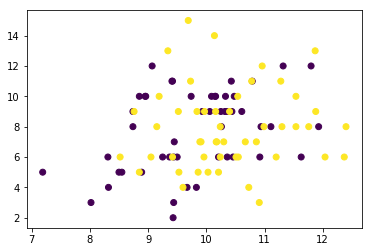

In [11]:
plt.scatter(data.x, data.y, c=data.f.cat.codes)

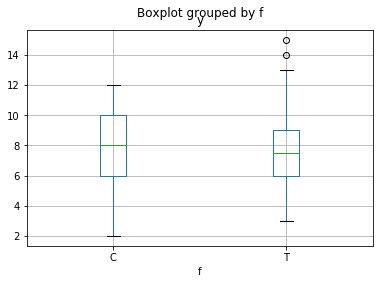

In [12]:
data.boxplot(column='y', by='f')

モデルの対数尤度は下記 $$
\log L(\beta_1,\beta_2) = \sum_i \log \frac{\lambda_i^{y_i}exp({-\lambda_i})}{y_i!}
$$

In [13]:
# 最尤推定値
import statsmodels.api as sm
import statsmodels.formula.api as smf

/Users/inoueshinichi/.pyenv/versions/anaconda3-5.0.1/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [14]:
model = smf.glm('y ~ x', data=data, family=sm.families.Poisson())

In [15]:
result = model.fit()

In [16]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                  100
Model:                            GLM   Df Residuals:                       98
Model Family:                 Poisson   Df Model:                            1
Link Function:                    log   Scale:                             1.0
Method:                          IRLS   Log-Likelihood:                -235.39
Date:                Sat, 15 Sep 2018   Deviance:                       84.993
Time:                        19:48:54   Pearson chi2:                     83.8
No. Iterations:                     4                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.2917      0.364      3.552      0.000       0.579       2.005
x              0.0757      0.036      2.125      0.034       0.006       0.145
==============================================================================
"""

In [17]:
# Z値　Wald統計量=推定値/標準誤差SE
result.params / result.bse

Intercept    3.551742
x            2.125084
dtype: float64

In [18]:
# 最大対数尤度
result.llf

-235.38625076986077

In [19]:
# 自由度
result.df_model

1

3.4.3 ポアソン回帰モデルによる予測

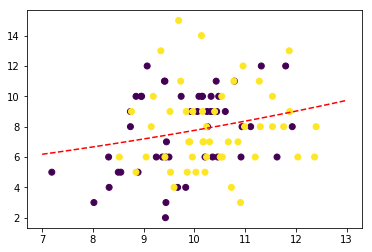

In [20]:
x = np.linspace(7, 13, 100)
y = np.exp(result.params['Intercept'] + x * result.params['x'])

plt.scatter(data.x, data.y, c=data.f.cat.codes)
plt.plot(x, y, 'r--')
plt.show()

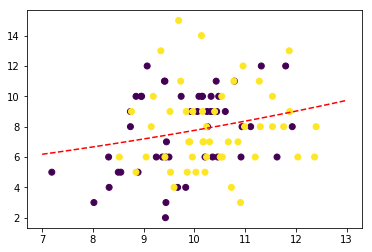

In [22]:
x = np.linspace(7, 13, 100)

plt.scatter(data.x, data.y, c=data.f.cat.codes)
plt.plot(x, result.predict({'x': x}), 'r--')
plt.show()

In [23]:
model = smf.glm('y ~ f', data=data, family=sm.families.Poisson())
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                  100
Model:                            GLM   Df Residuals:                       98
Model Family:                 Poisson   Df Model:                            1
Link Function:                    log   Scale:                             1.0
Method:                          IRLS   Log-Likelihood:                -237.63
Date:                Sat, 15 Sep 2018   Deviance:                       89.475
Time:                        21:22:24   Pearson chi2:                     87.1
No. Iterations:                     4                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.0516      0.051     40.463      0.000       1.952       2.151
f[T.T]         0.0128      0.071      0.179      0.858      -0.127       0.153
==============================================================================
"""

In [24]:
result.llf

-237.62725696068688

In [25]:
data.head()

,y,x,f
0,6,8.31,C
1,6,9.44,C
2,6,9.50,C
3,12,9.07,C
4,10,10.16,C


In [26]:
model = smf.glm('y ~ x + f', data=data, family=sm.families.Poisson())
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                  100
Model:                            GLM   Df Residuals:                       97
Model Family:                 Poisson   Df Model:                            2
Link Function:                    log   Scale:                             1.0
Method:                          IRLS   Log-Likelihood:                -235.29
Date:                Sat, 15 Sep 2018   Deviance:                       84.808
Time:                        21:32:05   Pearson chi2:                     83.8
No. Iterations:                     4                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.2631      0.370      3.417      0.001       0.539       1.988
f[T.T]        -0.0320      0.074     -0.430      0.667      -0.178       0.114
x              0.0801      0.037      2.162      0.031       0.007       0.153
==============================================================================
"""

In [27]:
result.llf

-235.29371924249364

In [28]:
# モデルの自由度
result.df_model

2

課題
3つの説明変数でポアソン回帰をやってみよう
sklearnにあるサンプルデータで試してみた
ノースカロライナ州立大学の A. C. linnerud 博士が作成した、20 人の成人男性に対してフィットネスクラブで測定した 3 つの生理学的特徴と 3 つの運動能力の関係。(参照)
腹筋の回数を、体重、ウエスト、脈拍に対して当てはめる。

In [29]:
from sklearn.datasets import load_linnerud
linnerud = load_linnerud()

In [30]:
linnerud

{'DESCR': 'Linnerrud dataset\n=================\n\nNotes\n-----\nData Set Characteristics:\n    :Number of Instances: 20\n    :Number of Attributes: 3\n    :Missing Attribute Values: None\n\nThe Linnerud dataset constains two small dataset:\n\n- *exercise*: A list containing the following components: exercise data with\n  20 observations on 3 exercise variables: Weight, Waist and Pulse.\n\n- *physiological*: Data frame with 20 observations on 3 physiological variables:\n   Chins, Situps and Jumps.\n\nReferences\n----------\n  * Tenenhaus, M. (1998). La regression PLS: theorie et pratique. Paris: Editions Technic.\n',
 'data': array([[  5., 162.,  60.],
        [  2., 110.,  60.],
        [ 12., 101., 101.],
        [ 12., 105.,  37.],
        [ 13., 155.,  58.],
        [  4., 101.,  42.],
        [  8., 101.,  38.],
        [  6., 125.,  40.],
        [ 15., 200.,  40.],
        [ 17., 251., 250.],
        [ 17., 120.,  38.],
        [ 13., 210., 115.],
        [ 14., 215., 105.],
   

In [31]:
df_csj = pd.DataFrame(linnerud.data, columns=linnerud.feature_names)

In [32]:
df_csj.head()

,Chins,Situps,Jumps
0,5.0,162.0,60.0
1,2.0,110.0,60.0
2,12.0,101.0,101.0
3,12.0,105.0,37.0
4,13.0,155.0,58.0


In [34]:
df_wwp = pd.DataFrame(linnerud.target, columns=linnerud.target_names)

In [35]:
df_wwp.head()

,Weight,Waist,Pulse
0,191.0,36.0,50.0
1,189.0,37.0,52.0
2,193.0,38.0,58.0
3,162.0,35.0,62.0
4,189.0,35.0,46.0


In [38]:
# df_wwpに'Chins', 'Situps', 'Jumps'を追加
df_wwp['Chins'] = df_csj.Chins
df_wwp['Situps'] = df_csj.Situps
df_wwp['Jumps'] = df_csj.Jumps

In [39]:
df_wwp.head()

,Weight,Waist,Pulse,Chins,Situps,Jumps
0,191.0,36.0,50.0,5.0,162.0,60.0
1,189.0,37.0,52.0,2.0,110.0,60.0
2,193.0,38.0,58.0,12.0,101.0,101.0
3,162.0,35.0,62.0,12.0,105.0,37.0
4,189.0,35.0,46.0,13.0,155.0,58.0


In [41]:
# Chins ~ Weight + Waist + Pulse モデル
model_chins = smf.glm('Chins ~ Weight + Waist + Pulse',
                     data=df_wwp,
                     family=sm.families.Poisson(link=sm.families.links.log))
result_chins = model_chins.fit()
result_chins.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Chins   No. Observations:                   20
Model:                            GLM   Df Residuals:                       16
Model Family:                 Poisson   Df Model:                            3
Link Function:                    log   Scale:                             1.0
Method:                          IRLS   Log-Likelihood:                -60.048
Date:                Sat, 15 Sep 2018   Deviance:                       42.548
Time:                        21:50:35   Pearson chi2:                     39.8
No. Iterations:                     4                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.7521      1.503      5.157      0.000       4.806      10.698
Weight         0.0067      0.006      1.168      0.243      -0.005       0.018
Waist         -0.1807      0.049     -3.654      0.000      -0.278      -0.084
Pulse         -0.0068      0.010     -0.677      0.499      -0.027       0.013
==============================================================================
"""

In [59]:
se_pred_chins = result_chins.predict(df_wwp[['Weight', 'Waist', 'Pulse']])
se_pred_chins

0      8.946231
1      7.267619
2      5.981289
3      8.122894
4     10.867774
5      8.081955
6      6.844403
7     10.202940
8     16.936457
9     11.510169
10    11.073281
11    12.824211
12     9.096078
13     2.141217
14     9.318954
15     7.407542
16     6.568441
17    14.460827
18    11.826804
19     9.520914
dtype: float64

In [64]:
pd.concat([df_wwp[['Weight', 'Waist', 'Pulse', 'Chins']], 
           pd.DataFrame({'predict': se_pred_chins})],
         axis=1)

,Weight,Waist,Pulse,Chins,predict
0,191.0,36.0,50.0,5.0,8.946231
1,189.0,37.0,52.0,2.0,7.267619
2,193.0,38.0,58.0,12.0,5.981289
3,162.0,35.0,62.0,12.0,8.122894
4,189.0,35.0,46.0,13.0,10.867774
5,182.0,36.0,56.0,4.0,8.081955
6,211.0,38.0,56.0,8.0,6.844403
7,167.0,34.0,60.0,6.0,10.202940
8,176.0,31.0,74.0,15.0,16.936457
9,154.0,33.0,56.0,17.0,11.510169


Text(0,0.5,"Residual of Chins's prediction")

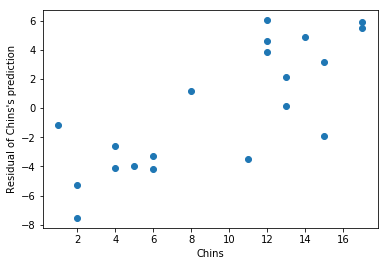

In [68]:
resid_chins = (df_wwp.Chins - se_pred_chins)
plt.scatter(df_wwp.Chins, resid_chins)
plt.xlabel('Chins')
plt.ylabel("Residual of Chins's prediction")